In [ ]:
import pandas as pd

# Load dataset from Colab's file explorer
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:15:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

# Reshape for CNN: (samples, features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# CNN model
cnn = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_encoded)), activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_cnn = cnn.predict(X_test_cnn).argmax(axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2022 - loss: 2.8184
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6010 - loss: 1.6255
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7658 - loss: 0.8863
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8378 - loss: 0.5801
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8577 - loss: 0.4571
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8980 - loss: 0.3403
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9015 - loss: 0.3166
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9128 - loss: 0.2566
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9332 - loss: 0.2265
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9350 - loss: 0.2107
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9255 - loss: 0.2115
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9478

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("CNN", y_test, y_pred_cnn)
evaluate_model("Rf", y_test, y_pred_rf)


KNN Results:
Accuracy: 0.9568181818181818
Precision: 0.9628976143584398
Recall: 0.9568181818181818
F1 Score: 0.9567492608232794

SVM Results:
Accuracy: 0.9681818181818181
Precision: 0.9715171192443921
Recall: 0.9681818181818181
F1 Score: 0.9680271341017991

XGBoost Results:
Accuracy: 0.9863636363636363
Precision: 0.9869011544011543
Recall: 0.9863636363636363
F1 Score: 0.986347164805032

CNN Results:
Accuracy: 0.9431818181818182
Precision: 0.9507037284610814
Recall: 0.9431818181818182
F1 Score: 0.9434222561433996

Rf Results:
Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1 Score: 0.9931754816901672


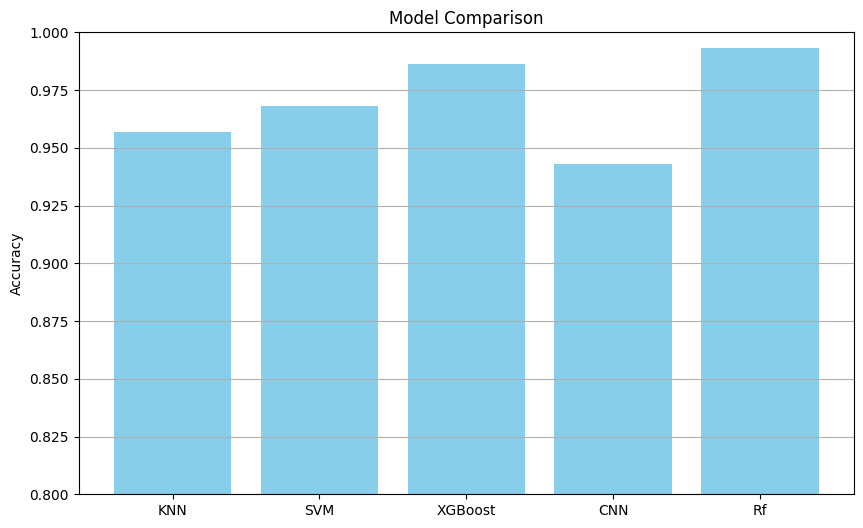

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'SVM', 'XGBoost', 'CNN','Rf']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_cnn),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.8, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# 🔢 Sample input (you can change values to test other inputs)
sample_data = pd.DataFrame([{
    'N': 70,
    'P': 52,
    'K': 63,
    'temperature': 35.0,
    'humidity': 90.0,
    'ph': 6.7,
    'rainfall': 246.0
}])

# Create a StandardScaler instance and fit it to your training data
# Assuming X_train is your training data
scaler = StandardScaler() # Define 'scaler'
scaler.fit(X_train) # Assuming X_train is your training data

# ⚖️ Scale sample input
sample_scaled = scaler.transform(sample_data)
sample_cnn = sample_scaled.reshape(sample_scaled.shape[0], sample_scaled.shape[1], 1)

# 🤖 Make predictions with all models
pred_knn = label_encoder.inverse_transform(knn.predict(sample_scaled))[0]
pred_svm = label_encoder.inverse_transform(svm.predict(sample_scaled))[0]
pred_xgb = label_encoder.inverse_transform(xgb.predict(sample_data))[0]
pred_cnn_label = np.argmax(cnn.predict(sample_cnn), axis=1)
pred_cnn = label_encoder.inverse_transform(pred_cnn_label)[0]

# 📊 Show all predictions in one table
comparison = pd.DataFrame({
    "Model": ["KNN", "SVM", "XGBoost", "CNN" ,'Rf'],
    "Predicted Crop": [pred_knn, pred_svm, pred_xgb, pred_cnn,pred_rf]
})

print("✅ Predictions for given input:")
print(sample_data)
print("\n🌾 Model-wise Predictions:")
display(comparison)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
✅ Predictions for given input:
    N   P   K  temperature  humidity   ph  rainfall
0  70  52  63         35.0      90.0  6.7     246.0

🌾 Model-wise Predictions:


,Model,Predicted Crop
0,KNN,papaya
1,SVM,papaya
2,XGBoost,papaya
3,CNN,papaya
4,Rf,papaya


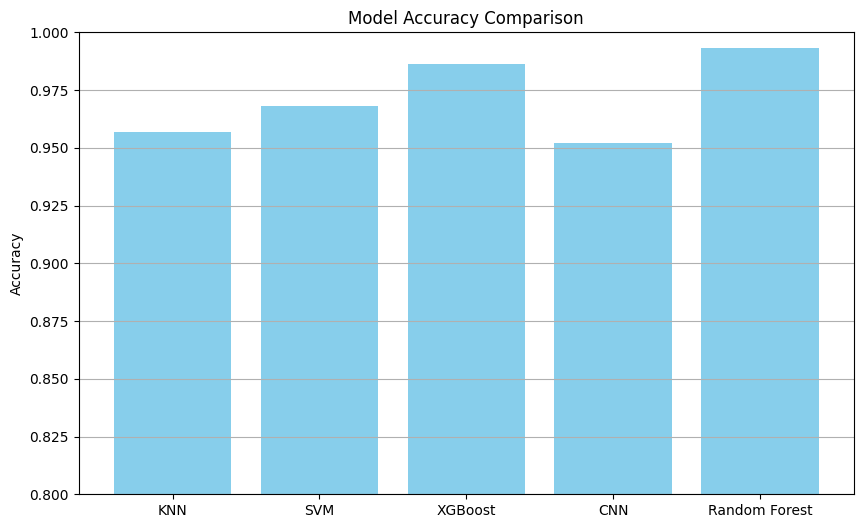

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'SVM', 'XGBoost', 'CNN', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_cnn),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1)
plt.grid(axis='y')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("CNN", y_test, y_pred_cnn)
evaluate_model("Random Forest", y_test, y_pred_rf)


KNN Results:
Accuracy: 0.9568181818181818
Precision: 0.9628976143584398
Recall: 0.9568181818181818
F1 Score: 0.9567492608232794

SVM Results:
Accuracy: 0.9681818181818181
Precision: 0.9715171192443921
Recall: 0.9681818181818181
F1 Score: 0.9680271341017991

XGBoost Results:
Accuracy: 0.9863636363636363
Precision: 0.9869011544011543
Recall: 0.9863636363636363
F1 Score: 0.986347164805032

CNN Results:
Accuracy: 0.9522727272727273
Precision: 0.9575748720975994
Recall: 0.9522727272727273
F1 Score: 0.9525697483453827

Random Forest Results:
Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1 Score: 0.9931754816901672



KNN Results:
Accuracy: 0.9568181818181818
Precision: 0.9628976143584398
Recall: 0.9568181818181818
F1 Score: 0.9567492608232794

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.90      0.95        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00   

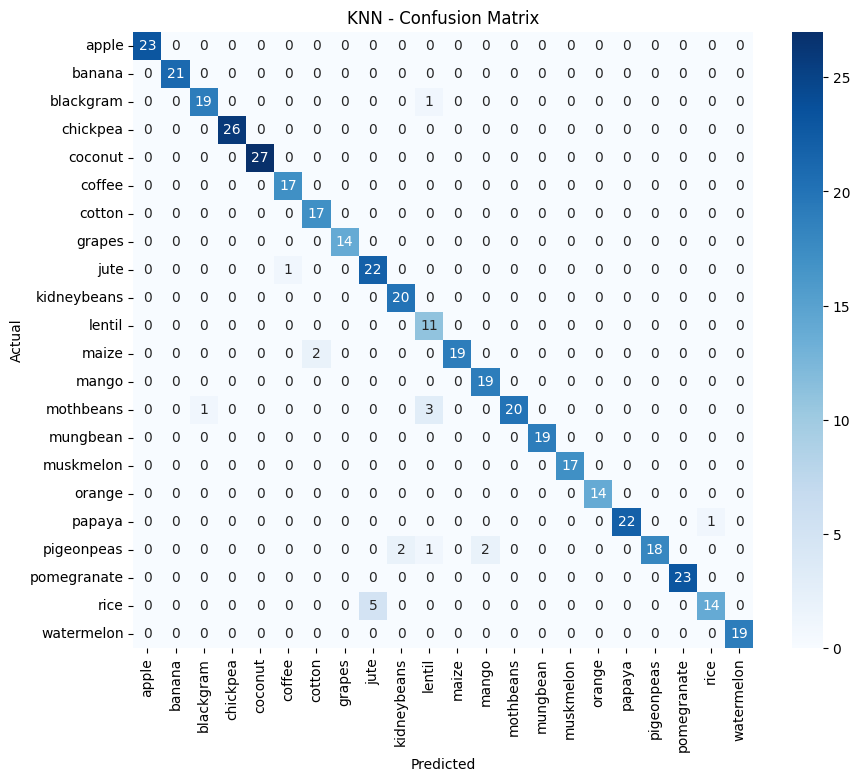


SVM Results:
Accuracy: 0.9681818181818181
Precision: 0.9715171192443921
Recall: 0.9681818181818181
F1 Score: 0.9680271341017991

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00   

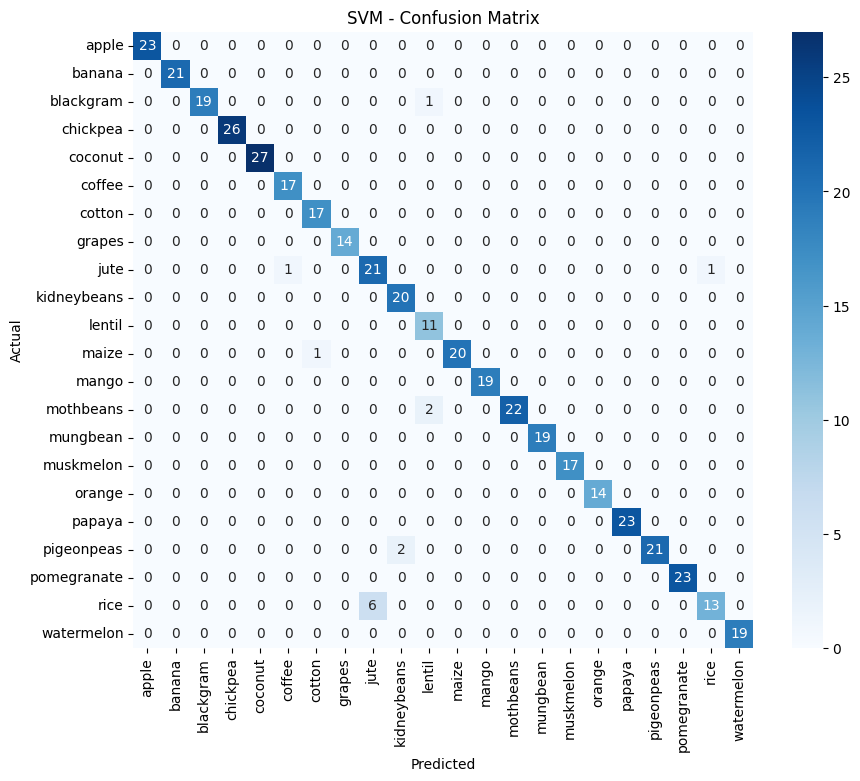


XGBoost Results:
Accuracy: 0.9863636363636363
Precision: 0.9869011544011543
Recall: 0.9863636363636363
F1 Score: 0.986347164805032

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00

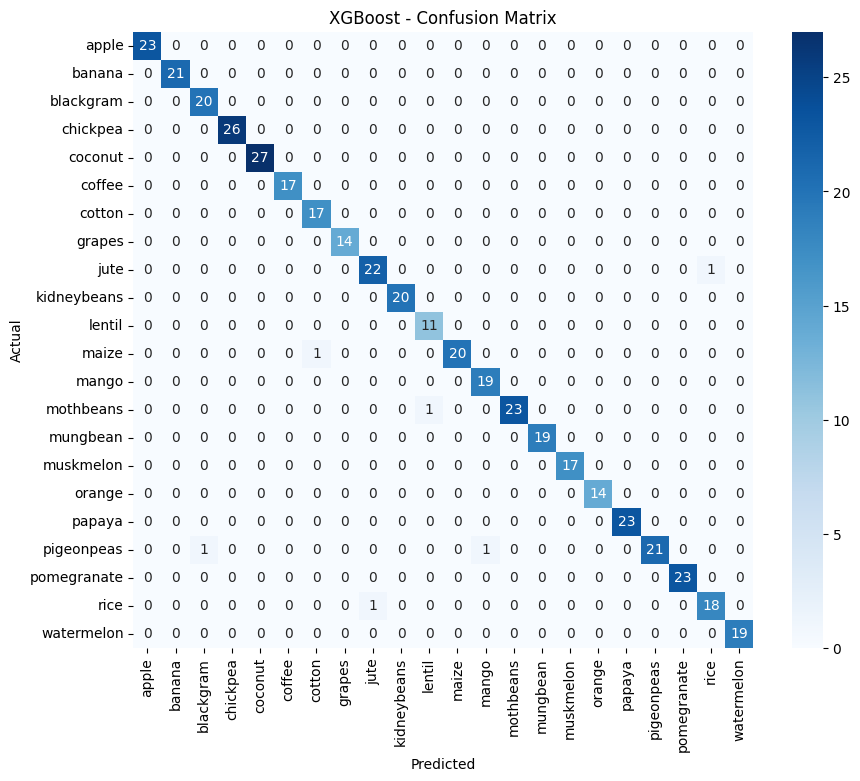


CNN Results:
Accuracy: 0.9522727272727273
Precision: 0.9575748720975994
Recall: 0.9522727272727273
F1 Score: 0.9525697483453827

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.81      1.00      0.89        17
      grapes       1.00      1.00      1.00        14
        jute       0.82      0.78      0.80        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.81      0.89        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.79      0.88        24
    mungbean       1.00      1.00   

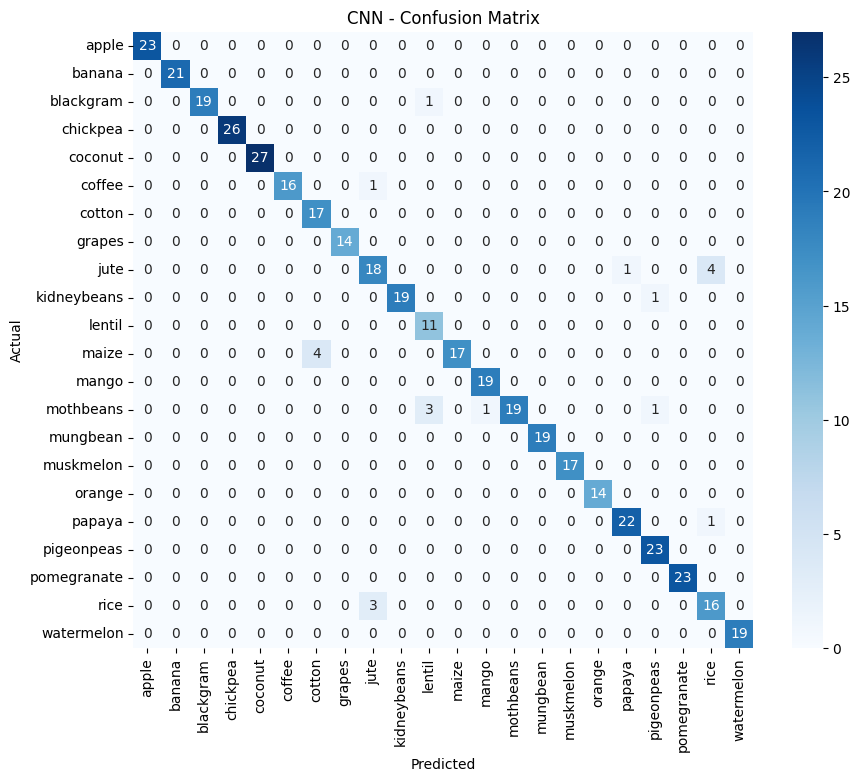


Random Forest Results:
Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1 Score: 0.9931754816901672

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00   

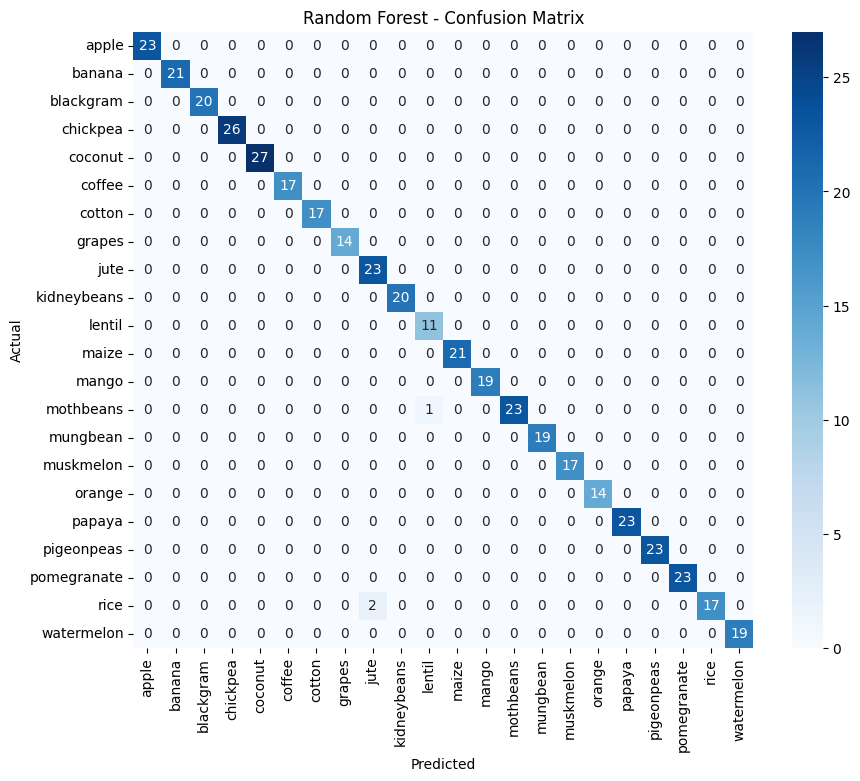

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("CNN", y_test, y_pred_cnn)
evaluate_model("Random Forest", y_test, y_pred_rf)

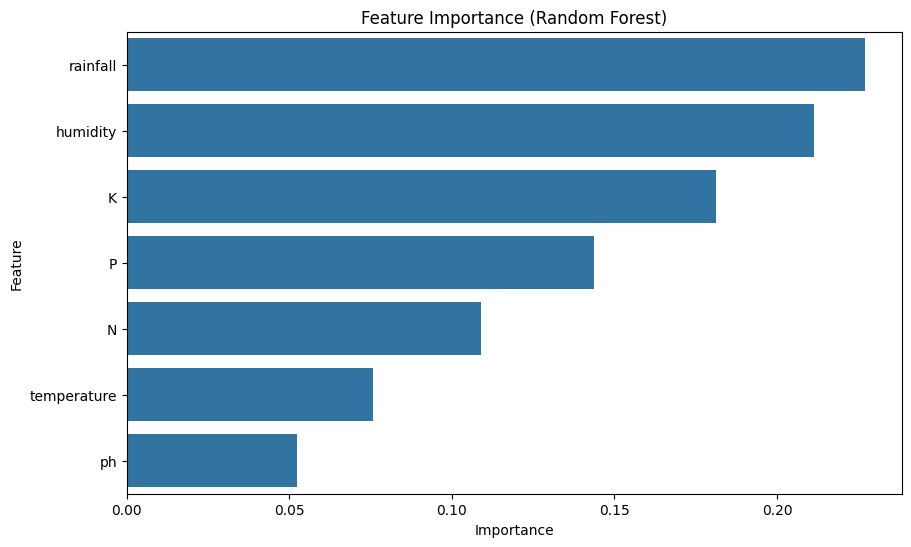

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


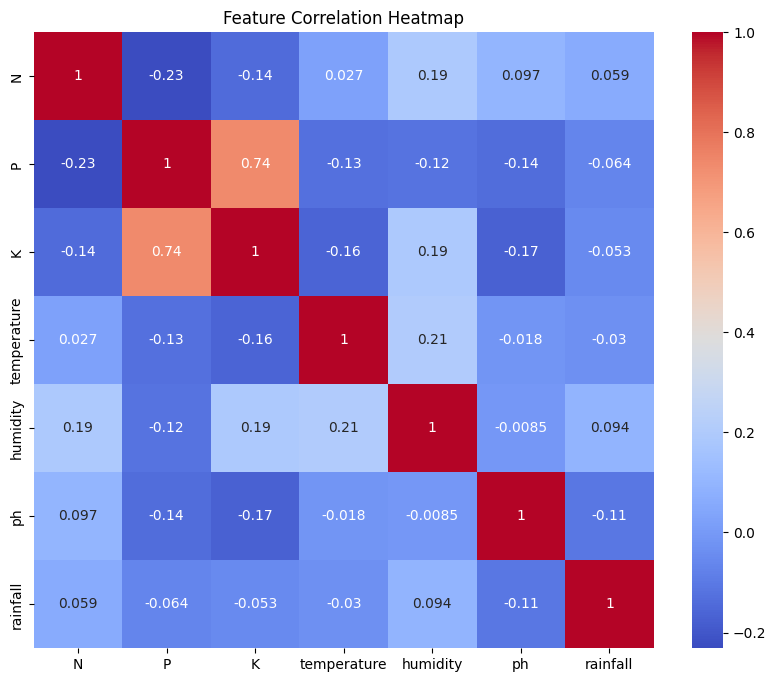

In [ ]:
# Select only numeric features for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

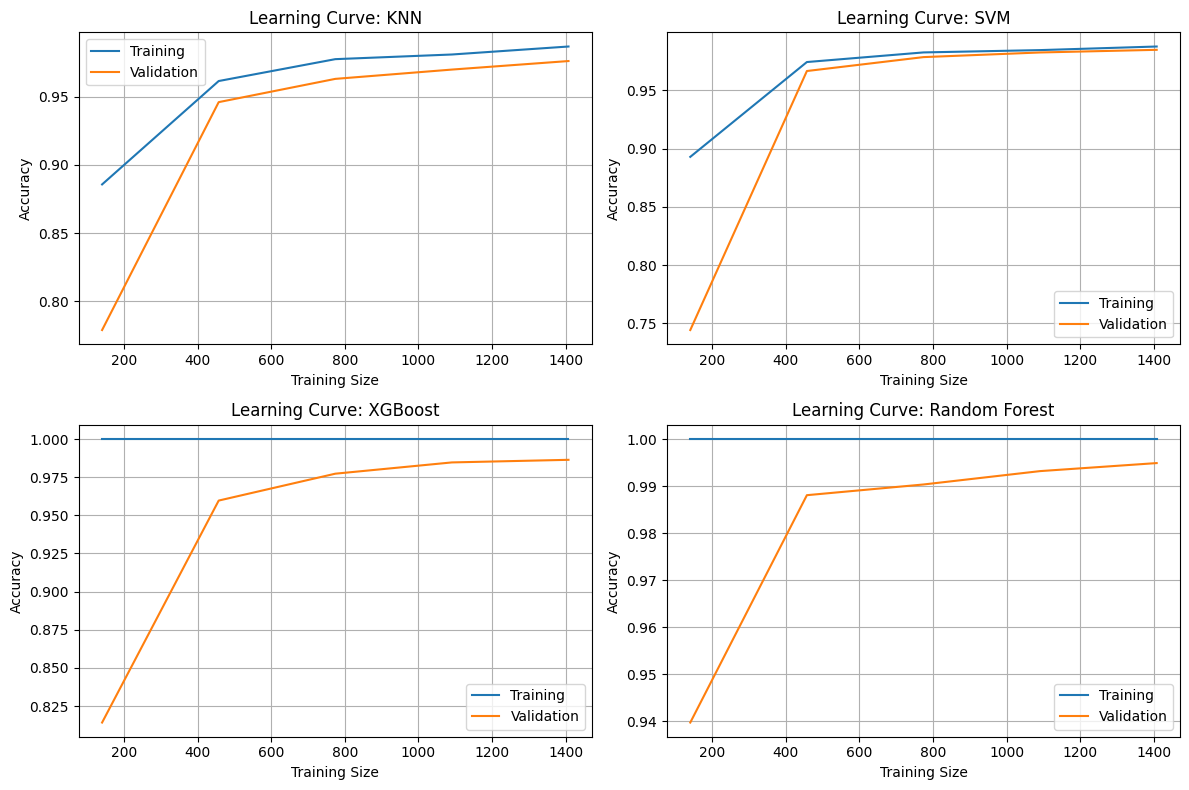

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9608 - loss: 0.1169 - val_accuracy: 0.9432 - val_loss: 0.1173
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9658 - loss: 0.0928 - val_accuracy: 0.9545 - val_loss: 0.1092
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9698 - loss: 0.0999 - val_accuracy: 0.9591 - val_loss: 0.1087
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9680 - loss: 0.0929 - val_accuracy: 0.9455 - val_loss: 0.1180
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9692 - loss: 0.0847 - val_accuracy: 0.9500 - val_loss: 0.1167
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.0860 - val_accuracy: 0.9614 - val_loss: 0.1073
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9829 - loss: 0.0674 - val_accuracy: 0.9500 - val_loss: 0.1145
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9727 - loss: 0.0778 - val_accuracy: 0.9500 - val_loss:

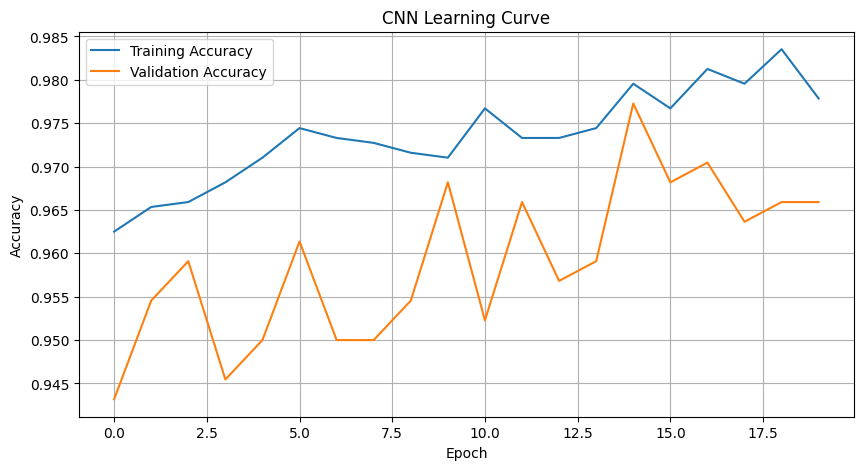

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

models_list = [(knn, 'KNN'), (svm, 'SVM'), (xgb, 'XGBoost'), (rf, 'Random Forest')]

plt.figure(figsize=(12, 8))
for i, (model, name) in enumerate(models_list, 1):
    plt.subplot(2, 2, i)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='Training')
    plt.plot(train_sizes, test_mean, label='Validation')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
# Assuming 'history' is the result of cnn.fit(...)
history = cnn.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    verbose=1
)

# Plot CNN learning curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9886 - loss: 0.0297 - val_accuracy: 0.9727 - val_loss: 0.0577
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9889 - loss: 0.0349 - val_accuracy: 0.9659 - val_loss: 0.0718
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9863 - loss: 0.0400 - val_accuracy: 0.9659 - val_loss: 0.0776
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0243 - val_accuracy: 0.9659 - val_loss: 0.0910
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0355 - val_accuracy: 0.9659 - val_loss: 0.0697
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.0392 - val_accuracy: 0.9682 - val_loss: 0.0658
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9822 - loss: 0.0388 - val_accuracy: 0.9750 - val_loss: 0.0562
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9727 - val_loss:

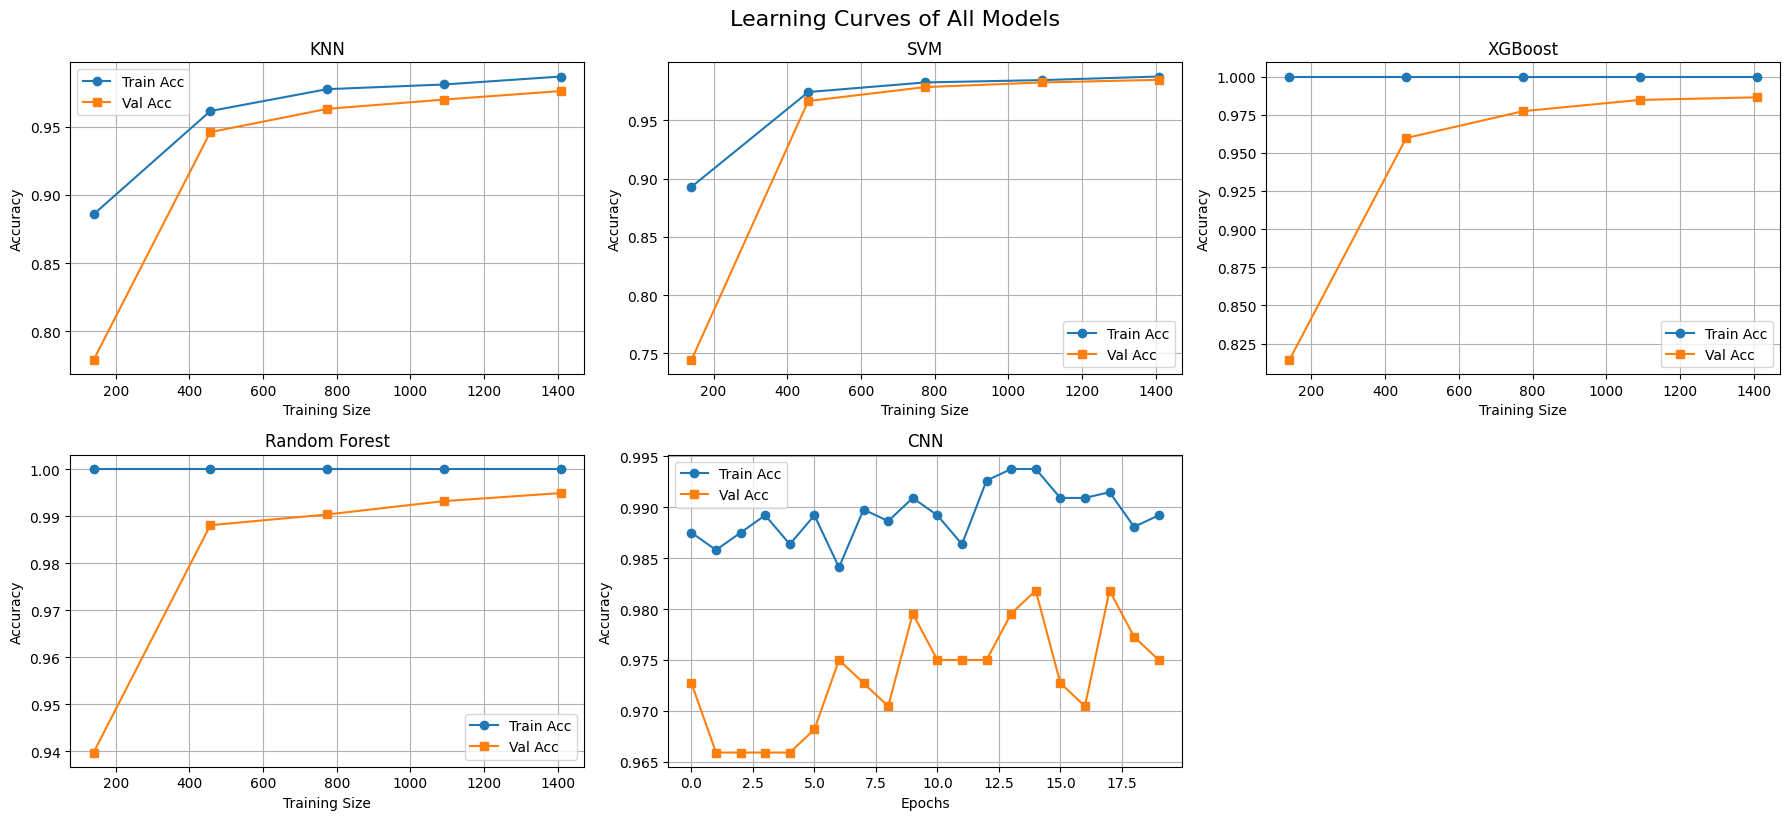

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Prepare the figure with 3 subplots in the first row and 2 in the second
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Flatten axs for easy indexing
axs = axs.flatten()

# Classical ML models
models_list = [(knn, 'KNN'), (svm, 'SVM'), (xgb, 'XGBoost'), (rf, 'Random Forest')]

for i, (model, name) in enumerate(models_list):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    axs[i].plot(train_sizes, train_mean, marker='o', label='Train Acc')
    axs[i].plot(train_sizes, test_mean, marker='s', label='Val Acc')
    axs[i].set_title(f'{name}')
    axs[i].set_xlabel('Training Size')
    axs[i].set_ylabel('Accuracy')
    axs[i].legend()
    axs[i].grid(True)

# CNN learning curve (placed in 6th subplot but only 5th will be used)
history = cnn.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    verbose=1
)

axs[4].plot(history.history['accuracy'], label='Train Acc', marker='o')
axs[4].plot(history.history['val_accuracy'], label='Val Acc', marker='s')
axs[4].set_title('CNN')
axs[4].set_xlabel('Epochs')
axs[4].set_ylabel('Accuracy')
axs[4].legend()
axs[4].grid(True)

# Hide the last (empty) plot
fig.delaxes(axs[5])

plt.tight_layout()
plt.suptitle('Learning Curves of All Models', fontsize=16, y=1.02)
plt.show()


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9666 - loss: 0.1071 - val_accuracy: 0.9568 - val_loss: 0.1192
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9557 - loss: 0.1120 - val_accuracy: 0.9523 - val_loss: 0.1208
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.0950 - val_accuracy: 0.9568 - val_loss: 0.1150
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9638 - loss: 0.1071 - val_accuracy: 0.9614 - val_loss: 0.1113
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9609 - loss: 0.1062 - val_accuracy: 0.9500 - val_loss: 0.1202
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.0915 - val_accuracy: 0.9614 - val_loss: 0.1101
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9720 - loss: 0.0883 - val_accuracy: 0.9545 - val_loss: 0.1101
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9629 - loss: 0.0974 - val_accuracy: 0.9636 - val_loss:

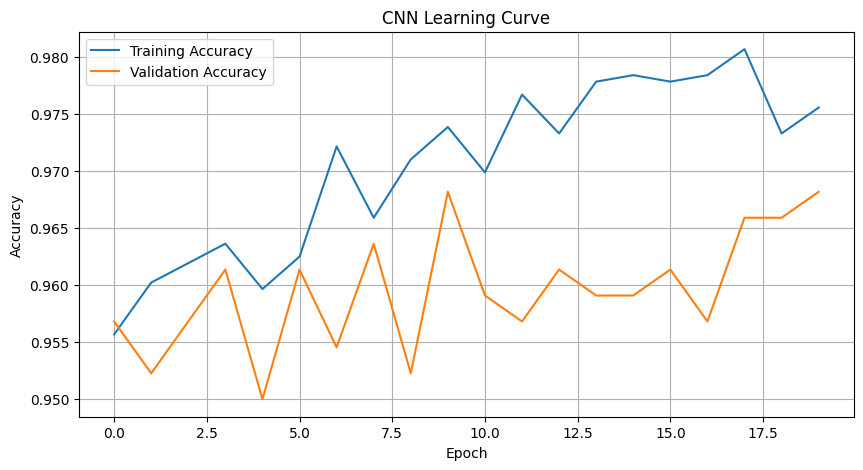

In [ ]:
# Assuming 'history' is the result of cnn.fit(...)
history = cnn.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    verbose=1
)

# Plot CNN learning curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


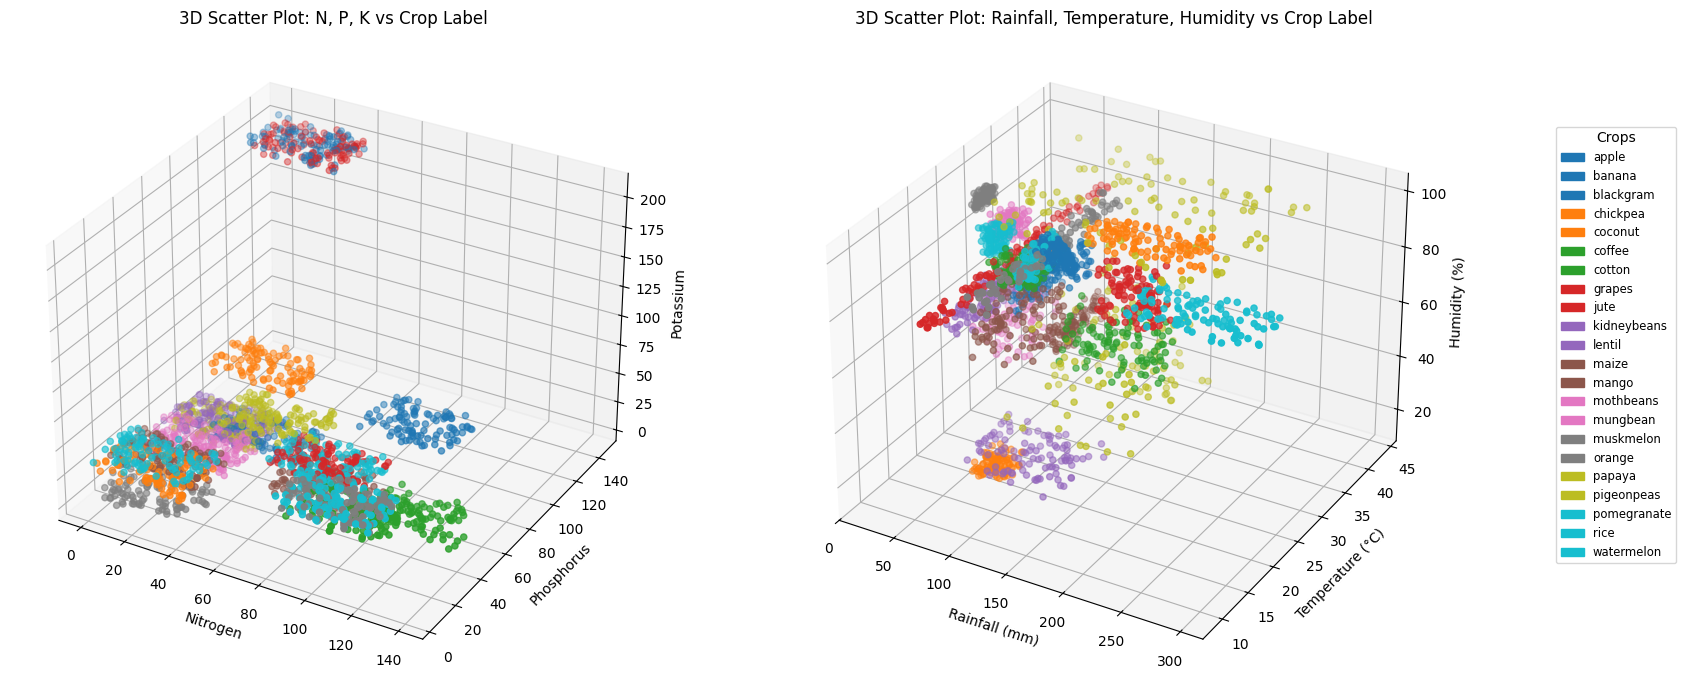

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(16, 7))

# First 3D scatter plot: Nitrogen, Phosphorus, Potassium
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(df['N'], df['P'], df['K'], c=y_encoded, cmap='tab10')
legend_labels = label_encoder.classes_
legend_handles = [mpatches.Patch(color=scatter1.cmap(scatter1.norm(i)), label=legend_labels[i]) for i in range(len(legend_labels))]
ax1.set_xlabel('Nitrogen')
ax1.set_ylabel('Phosphorus')
ax1.set_zlabel('Potassium')
ax1.set_title('3D Scatter Plot: N, P, K vs Crop Label')

# Second 3D scatter plot: Rainfall, Temperature, Humidity
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(df['rainfall'], df['temperature'], df['humidity'], c=y_encoded, cmap='tab10')
ax2.set_xlabel('Rainfall (mm)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_zlabel('Humidity (%)')
ax2.set_title('3D Scatter Plot: Rainfall, Temperature, Humidity vs Crop Label')

# Add a vertical legend to the right of the plots
fig.legend(
    handles=legend_handles,
    title="Crops",
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # Push to the right side, vertically centered
    borderaxespad=0,
    fontsize='small'
)

plt.tight_layout()
plt.show()


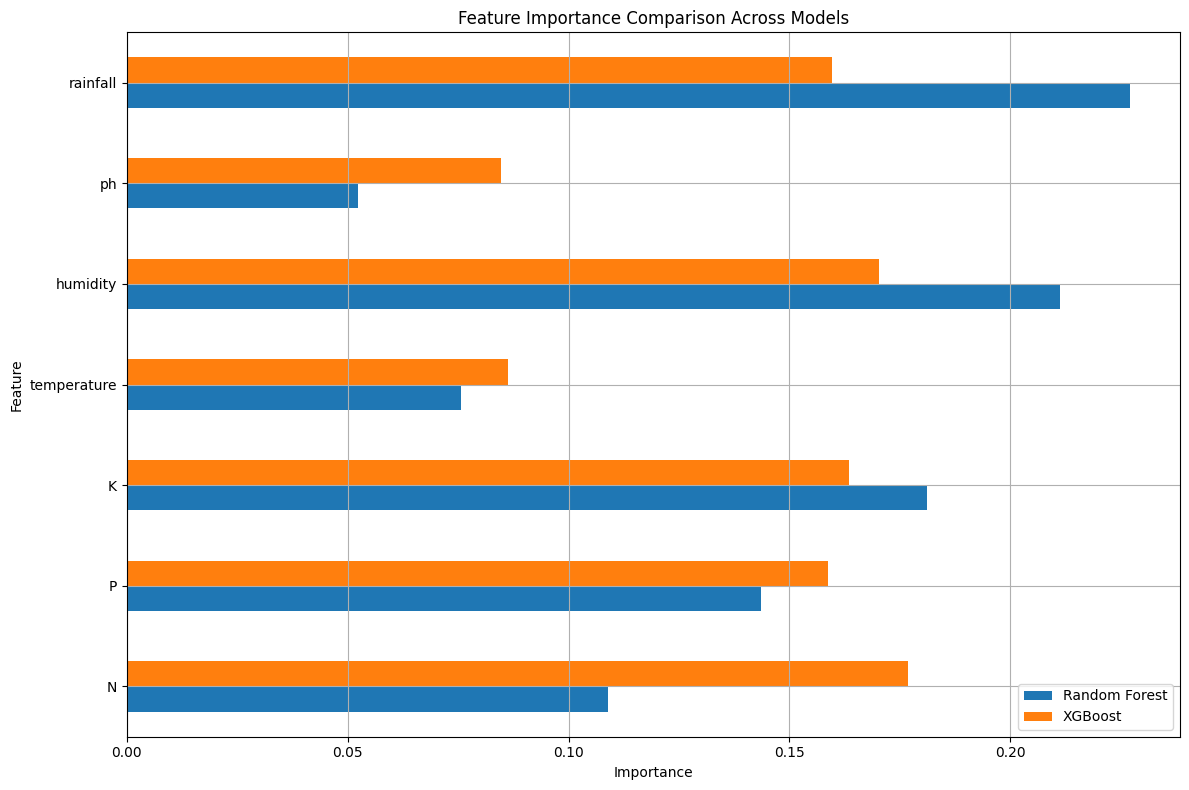

In [ ]:
feat_importance_df = pd.DataFrame({'Feature': X.columns})

# Random Forest
feat_importance_df['Random Forest'] = rf.feature_importances_



# XGBoost
feat_importance_df['XGBoost'] = xgb.feature_importances_

# For CNN, feature importance is not straightforward. We skip it for now.

# Plot
feat_importance_df.set_index('Feature').plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importance Comparison Across Models')
plt.xlabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

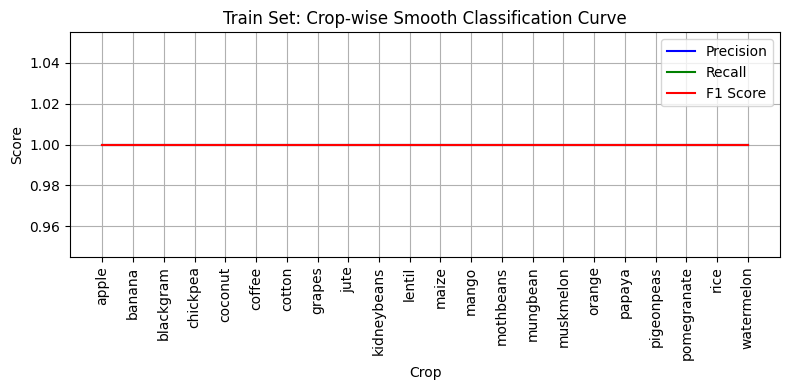

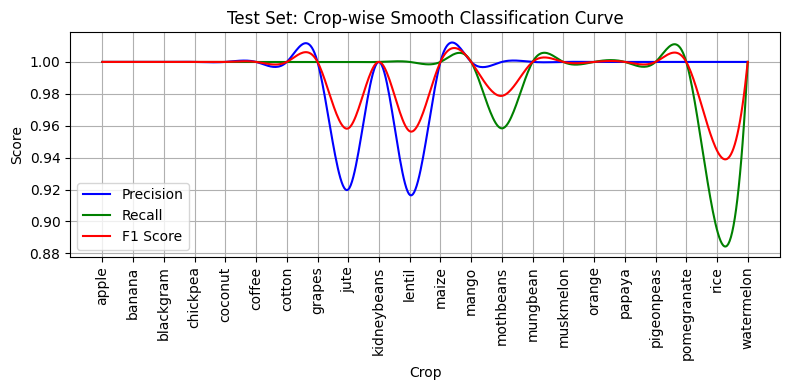

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

def smooth_curve_plot(x, y, label):
    x_numeric = np.arange(len(x))
    x_new = np.linspace(x_numeric.min(), x_numeric.max(), 500)
    spl = make_interp_spline(x_numeric, y, k=3)
    y_smooth = spl(x_new)
    return x_new, y_smooth

def plot_classification_curves_smooth(y_true, y_pred, dataset_label):
    report = classification_report(y_true, y_pred, output_dict=True, target_names=label_encoder.classes_)
    df_report = pd.DataFrame(report).transpose().iloc[:-3]  # remove 'accuracy', etc.
    df_report = df_report[['precision', 'recall', 'f1-score']].reset_index()
    df_report = df_report.rename(columns={'index': 'Crop'})

    x = df_report['Crop']
    precision = df_report['precision'].values
    recall = df_report['recall'].values
    f1 = df_report['f1-score'].values

    # Prepare smooth curves
    x_vals = np.arange(len(x))
    x_smooth, precision_smooth = smooth_curve_plot(x_vals, precision, 'Precision')
    _, recall_smooth = smooth_curve_plot(x_vals, recall, 'Recall')
    _, f1_smooth = smooth_curve_plot(x_vals, f1, 'F1 Score')

    plt.figure(figsize=(8, 4))
    plt.plot(x_smooth, precision_smooth, label='Precision', color='blue')
    plt.plot(x_smooth, recall_smooth, label='Recall', color='green')
    plt.plot(x_smooth, f1_smooth, label='F1 Score', color='red')

    plt.xticks(ticks=x_vals, labels=x, rotation=90)
    plt.title(f'{dataset_label} Set: Crop-wise Smooth Classification Curve')
    plt.xlabel('Crop')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example for Random Forest model
plot_classification_curves_smooth(y_train, rf.predict(X_train_scaled), "Train")
plot_classification_curves_smooth(y_test, y_pred_rf, "Test")




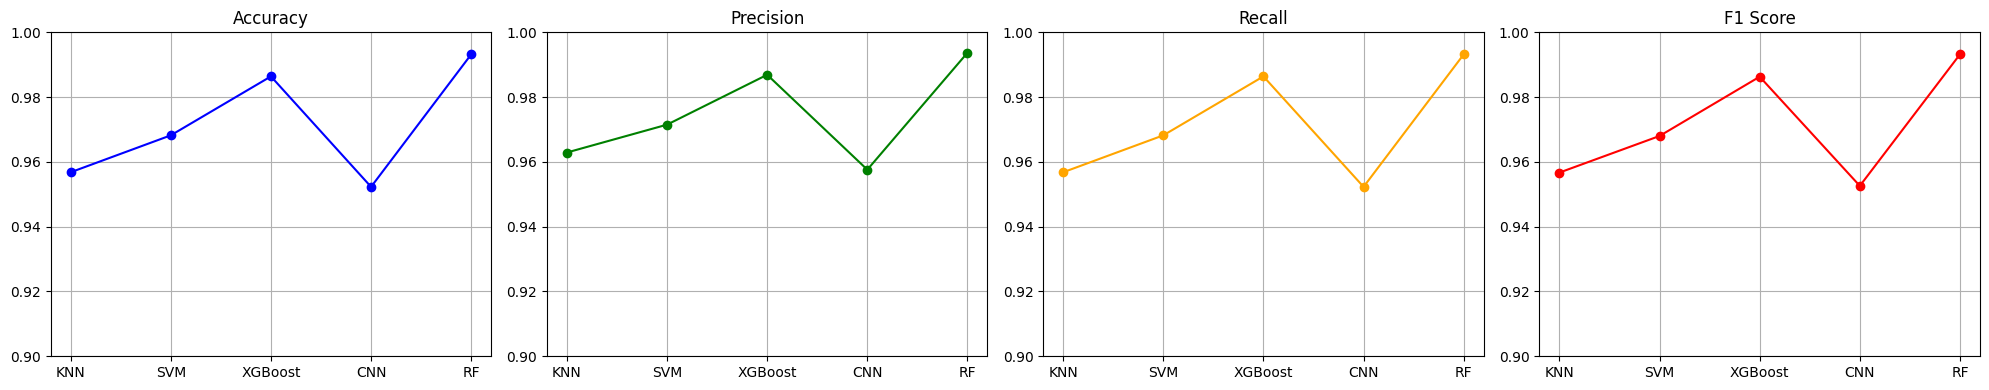

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding metrics
models = ['KNN', 'SVM', 'XGBoost', 'CNN', 'RF']
accuracy = [0.9568, 0.9682, 0.9864, 0.9523, 0.9932]
precision = [0.9629, 0.9715, 0.9869, 0.9576, 0.9937]
recall = [0.9568, 0.9682, 0.9864, 0.9523, 0.9932]
f1_score = [0.9567, 0.9680, 0.9863, 0.9526, 0.9932]

# Set up the figure with 4 subplots in one row
fig, axs = plt.subplots(1, 4, figsize=(20, 4))  # 4 graphs in one line

# Accuracy plot
axs[0].plot(models, accuracy, marker='o', color='blue')
axs[0].set_title('Accuracy')
axs[0].set_ylim([0.9, 1])
axs[0].grid(True)

# Precision plot
axs[1].plot(models, precision, marker='o', color='green')
axs[1].set_title('Precision')
axs[1].set_ylim([0.9, 1])
axs[1].grid(True)

# Recall plot
axs[2].plot(models, recall, marker='o', color='orange')
axs[2].set_title('Recall')
axs[2].set_ylim([0.9, 1])
axs[2].grid(True)

# F1 Score plot
axs[3].plot(models, f1_score, marker='o', color='red')
axs[3].set_title('F1 Score')
axs[3].set_ylim([0.9, 1])
axs[3].grid(True)

# Tight layout for cleaner spacing
plt.tight_layout()
plt.show()

